In [43]:
import torch
import matplotlib.pyplot as plt

In [282]:
N = 2_000 # number of repeats for each value
NUM_POINTS = 1_001 # number of values taken in range

In [283]:
x = torch.linspace(-2, 2, NUM_POINTS)
repeated_x = x.repeat((N, 1))

In [284]:
i = torch.tensor([0, 0.5, 1])
repeated_i = i.repeat((N, 1))

In [286]:
def round(repeated_vec):
    return torch.round(repeated_vec)

In [287]:
def randomized_rounding(repeated_vec):
    # encode and decode using randomized rounding
    raise NotImplementedError()

In [288]:
def subtractive_dithering(repeated_vec):
    # encode and decode using subtractive dithering
    raise NotImplementedError()

In [289]:
def shared_random_bit(repeated_vec):
    # encode and decode using a shared random bit
    # here the input is in {0, 0.5, 1}

    raise NotImplementedError()

In [297]:
def rmse(x1, x2):
    return torch.sqrt(torch.sum((x1 - x2)**2, dim=0) / N)

In [307]:
def plot_rmse():
    plt.title(f'{N=}')
    plt.scatter(x, rmse(randomized_rounding(repeated_x), x), s=5, label='randomized rounding')
    plt.scatter(x, rmse(subtractive_dithering(repeated_x), x), s=1, label='Subtractive dithering')
    plt.scatter(x, rmse(round(repeated_x), x), s=5, label='Round')
    plt.scatter(i, rmse(shared_random_bit(repeated_i), i)  , s=100, marker='X', edgecolor='y', label='Shared random bit')
    plt.ylabel('RMSE')
    plt.xlabel('x')
    plt.legend()

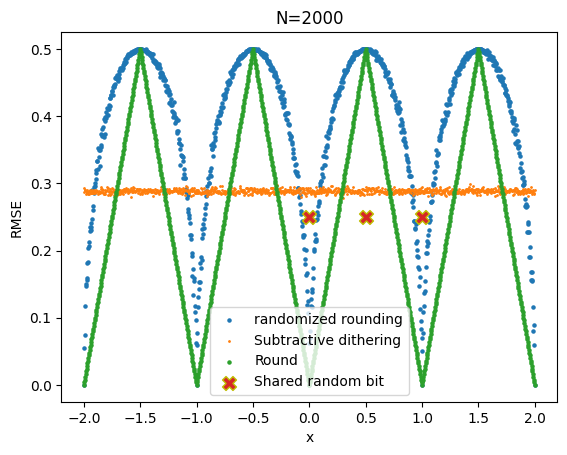

In [308]:
plot_rmse()

In [300]:
def bias(x1, x2):
    # aka mean signed deviation
    return torch.sum((x1 - x2), dim=0) / N

In [305]:
def plot_bias():
    plt.title(f'{N=}')
    plt.scatter(x, bias(randomized_rounding(repeated_x), x), s=5, label='randomized rounding')
    plt.scatter(x, bias(subtractive_dithering(repeated_x), x), s=1, label='Subtractive dithering')
    plt.scatter(x, bias(round(repeated_x), x), s=5, label='Round')
    plt.scatter(i, bias(shared_random_bit(repeated_i), i), s=100, marker='X', edgecolor='y', label='Shared random bit')
    plt.ylabel('Bias (mean deviation)')
    plt.xlabel('x')
    plt.legend()

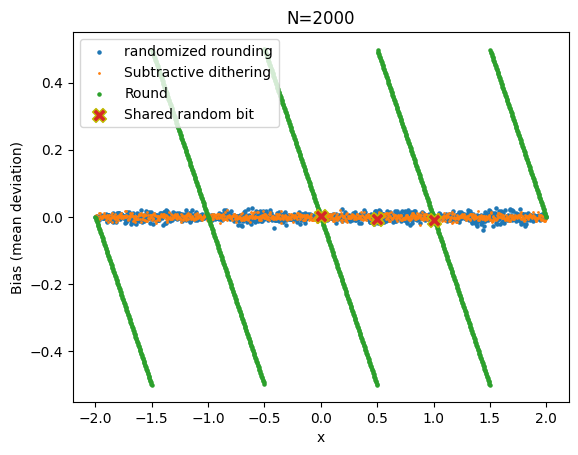

In [306]:
plot_bias()